In [1]:
%matplotlib inline
import string
import collections
import numpy as np
import matplotlib.pyplot as plt

# Codificación de fuente

Sea una fuente (*source*) que emite símbolos. El conjunto de todos los símbolos que puede emitir esta fuente se llama alfabeto de fuente.

**Ejemplo**

Considere el siguiente famoso libro digitalizado:

In [2]:
with open('data/quijote.txt', 'r') as file:
    texto = file.read()

print(texto[:101] + "...")

En un lugar de la Mancha, de cuyo nombre no quiero acordarme, no ha mucho tiempo que vivía un hidalgo...


Los símbolos de esta fuente incluyen las letras, los números, [los signos ortográficos](https://es.wikipedia.org/wiki/Signos_ortogr%C3%A1ficos), el espacio en blanco y el salto de linea.

:::{important}

La **codificación de fuente** (*source coding*) es el proceso que asigna un **código** a cada símbolo emitido por la fuente.

:::

**Ejemplo** 

Un código muy utilizado para transmitir información es el código binario. El alfabeto del código binario tiene dos elementos: `0` y `1`.

A partir de estos elementos se pueden formar todo tipo de "palabras de código": `00`, `01`, `101`, `10001`, ...

Digamos que queremos codificar el famoso texto anterior utilizando código binario. La cantidad de símbolos en el alfabeto de fuente es:

In [3]:
len(set(texto))

49

Si utilizamos un código binario de largo fijo para cada símbolo necesitariamos al menos 5 bits: $2^6 = 64 > 49$.

El largo del texto es:

In [4]:
len(texto)

3029

Y por lo tanto la cantidad de bits utilizando 6 bits por símbolo será:

In [5]:
len(texto)*6

18174

Cerca de 18.000 bits.

Sin embargo, esta forma ingenua de codificar no considera el importante hecho de que no todos los símbolos son igual de frecuentes/probables.

De los 49 símbolos, los 5 más frecuentes son:

In [6]:
collections.Counter(texto).most_common(5)

[(' ', 540), ('a', 316), ('e', 312), ('o', 201), ('s', 189)]

y los 5 menos frecuentes son:

In [7]:
collections.Counter(texto).most_common()[:-6:-1]

[('B', 1), ('N', 1), ('A', 1), ('C', 1), ('S', 1)]

:::{hint}

Podemos reducir la cantidad de bits del texto si usamos códigos más cortos para las letras más frecuentes.

:::

Para crear un código de largo de palabra variable en base a la probabilidad de aparición de los símbolos debemos estudiar  **la teoría de la información**.

## Introducción a la Teoría de la información

La Teoría de la Información (TI) es el estudio matemático de la cuantificación y transmisión de la información. Fue propuesto por **[Claude Shannon](https://es.wikipedia.org/wiki/Claude_Shannon)** en 1948: *A Mathematical Theory of Communication*. 

TI proporciona formas para describir la información de un proceso y tiene importantes aplicaciones en telecomunicaciones, computación y biología (genética). También ha tenido una fuerte influencia en la teoría de codificación y compresión.

**Ejemplo:** "Las dos fuentes"

Sean dos fuentes **F1** y **F2** que pueden emitir los siguientes cuatro símbolos: $A$, $B$, $C$ o $D$.

**F1** es completamente aleatoria, es decir: $P(A) = P(B) = P(C) = P(D) = \frac{1}{4}$.

Si queremos predecir el próximo valor emitido por **F1** ¿Cúal es el número mínimo de preguntas con respuesta si/no que debemos hacer?

<img src="images/information1.svg" width="600">

> La respuesta es 2 para cualquiera de los símbolos



**F2** en cambio emite $A$, $B$, $C$ y $D$ con probabilidades $P(A) =\frac{1}{2}$, $P(B) =\frac{1}{4}$, $P(C) = \frac{1}{8}$ y $P(D) =\frac{1}{8}$, respectivamente.

Si queremos predecir el próximo valor retornado por **F2** ¿Cúal es el número mínimo de preguntas con respuesta si/no que debemos hacer? 

<img src="images/information2.svg" width="800">

> La respuesta es 1 para $A$, 2 para $B$ y 3 para $C$ y $D$

### Cantidad de información (según Shannon)

La cantidad de información de un símbolo $x$ es el logaritmo en base dos del recíproco de su probabilidad de aparición

$$
I(x) = \log_2 \left(\frac{1}{P(x)} \right) = \log_2 P(x)^{-1} = - \log_2 P(x),
$$

que es equivalente a la mínima cantidad de preguntas si/no que debemos hacer para adivinar su valor

La cantidad de información se mide en **bits**

:::{important}

Un **bit** es la cantidad de información requerida para escoger entre **dos** alternativas equiprobables

:::

La cantidad de información es también llamada **sorpresa**

:::{note}

Mientras más improbable es un símbolo, más nos sorprendemos cuando observamos que ocurre

:::

### Entropía

Sea una variable aleatoria $X$ (fuente) con $N$ resultados posibles (símbolos) $\{x_1, x_2, \ldots, x_N\}$ donde cada símbolo $x_i$ tiene una probabilidad $p_i \in [0, 1]$ y $\sum_{i=1}^N p_i = 1$ 

Por ende cada símbolo tiene una cantidad de información  $I(x_i) = -\log_2 \left( p_i \right)$ 

Definimos la **cantidad de información promedio** de $X$ como

$$
\begin{align}
H (X) &= \mathbb{E}_{x\sim X} \left [ - \log P(X=x) \right ]  \nonumber \\
&= - \sum_{i=1}^N P(X=x_i) \log_2 P(X=x_i)  \nonumber \\
&= - \sum_{i=1}^N p_i \log_2 p_i  \quad \text{[bits/símbolo]} \nonumber
\end{align}
$$

que se conoce como **Entropía de Shannon** 

**Propiedades de la entropía**

- La entropía es siempre positiva $H(X) \geq 0$. La igualdad se cumple si un $x_i$ tiene $p_i=1$ (caso más predecible)
- La entropia está acotada $H(X) \leq H_0$, donde $H_0= \log_2(N)$ es la entropia si $p_i = \frac{1}{N}~ \forall i$ (caso menos predecible)
- La redundancia de $X$ es $1 - H(X)/H_0$

:::{note}

Mientras más predecible es $X$ menor es su entropía y mayor es su redundancia

:::


**Ejemplo:** El retorno de las dos fuentes

En promedio, ¿Cuántas preguntas por símbolo hace la fuente **F1**?

> $1 \frac{1}{4} + 1 \frac{1}{4} + 1 \frac{1}{4} + 1 \frac{1}{4} = 2$ preguntas por símbolo. Su entropía es $2$ [bits]

En promedio, ¿Cuántas preguntas por símbolo hace la fuente **F2**?

> $1 \frac{1}{2} + 2 \frac{1}{4} + 3 \frac{1}{8} + 3 \frac{1}{8} = 1.75$ preguntas por símbolo. Su entropía es $1.75$ [bits]

Si cada fuente retorna un mensaje de 100 símbolos ¿Cúanta información produjo cada una?

> **F1** produce 200 bits mientras que **F2** produce 175 bits

Mientras más predecible menos información se necesita




**Ejemplo:** "La moneda con truco"

Sea una variable aleatoria $X$ que modela el resultado de lanzar una moneda y asumamos que el resultado puede tomar solo dos valores: Cara $o$ o Cruz $x$

- La probabilidad de que salga cara es $p_o = p$
- La probabilidad de que salga cruz es $p_x = 1- p$


Luego la entropía es 

$$
\begin{align}
H(X) &= -\sum_{i=1}^2 p_i \log_2 p_i \nonumber \\ 
&= -p_x \log (p_x) - p_o \log p_o \nonumber \\
&= - p \log(p) - (1-p) \log(1-p)
\end{align}
$$

Reflexione:

- ¿En que casos la entropía es mínima? ¿En qué caso es máxima?
- ¿Puedes relacionar la entropía con la aleatoridad/sorpresa del resultado de lanzar la moneda?


Ojo: $\lim_{z\to 0^+} z \log 1/z = 0$

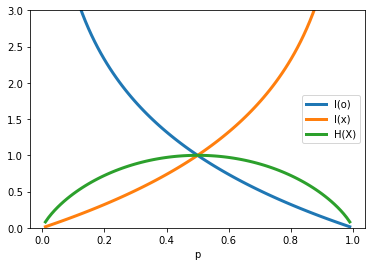

In [8]:
p = np.linspace(0.01, 0.99, num=100)
H = -p*np.log2(p) - (1-p)*np.log2(1-p)
fig, ax = plt.subplots(1, figsize=(6, 4), sharex=True)
ax.set_xlabel('p')
ax.plot(p, -np.log2(p), label='I(o)', lw=3)
ax.plot(p, -np.log2(1-p), label='I(x)', lw=3)
ax.plot(p, H, label='H(X)', lw=3)
ax.set_ylim([0, 3])
plt.legend();

**Ejemplo:** Entropía del fragmento del famoso libro

La entropía o cantidad de información promedio por símbolo es

In [9]:
freq = np.array(list(collections.Counter(texto).values()))
p = freq/np.sum(freq)
H = -np.sum(p*np.log2(p))
H

4.212472766686091

Luego podemos estimar la cantidad de bits del famoso texto como:

In [10]:
H*len(texto)

12759.580010292168

Más adelante veremos que tan acertado está este cálculo

**Ejemplo:** "Meteorólogos del siglo XIX"

Nos encontramos a finales del siglo XIX. La estación meteorológica de Niebla hace una predicción del tiempo en Valdivia. Esta información se envía a Valdivia a través de telégrafo. 

Calcule la cantidad de información promedio que envía la estación a Valdivia en cada uno de los siguientes escenarios usando la **entropía de Shannon**:

- Dos posibilidades: Lluvia y nublado, con probabilidad $1/2$ y $1/2$, respectivamente
- Una posibilidad: Lluvia, con probabilidad $1$
- Cuatro posibilidades: Lluvia, Nublado, Nubosidad parcial, soleado, con probabilidad $1/2$, $1/4$, $1/8$ y $1/8$, respectivamente

**Respuesta:** 

Las probabilidades de cada mensaje son $2^{-1}$, $2^{-2}$, $2^{-3}$ y $2^{-3}$. Luego la cantidad de información de cada mensaje es: 1, 2, 3 y 3 bits, respectivamente. Por ende la entropía es $1/2 + 1/2 + 3/8 + 3/8 = 1.75$ bits

### Código de largo de palabra variable

Para el **escenario 3** del ejemplo anterior códifique las alternativas usando un alfabeto de códigos binarios

> ¿Cómo le asignamos un código a cada alternativa?

**Opción 1:** Código de largo fijo

Tenemos cuatro estados.

Si todos los estados tienen igual cantidad de bits, necesitamos 2 bits para representarlos: `00`, `01`, `10`, `11`

En este caso resulta equivalente a asumir equiprobabilidad y la entropía es 2 bits

**Opción 2:** Código de largo variable (prefijo)

Se usa 1, 2, 3 y 3 bits para cada estado, según su probabilidad de aparición. En este caso la entropía es 1.75 bits

Podemos describir este escenario según

- Primera decisión equiprobable: Lluvia **(0)** vs El resto (1)
- Segunda decisión equiprobable: Nublado **(10)** vs El resto menos lluvia (11)
- Tercera decisión equiprobable: Nubosidad parcial **(110)** vs soleado **(111)**

Podemos representar graficamente usando un dendograma como se muestra a continuación

<img src="images/dendogram.png" width="500">

- Algoritmo de codificación con forma de árbol en base 2
- Los mensajes codificados están en las hojas del árbol
- **Código préfijo**: Ningún código puede ser prefijo de otro. 
- El código prefijo garantiza decodificación sin ambiguedad


**Ejercicio**

Se recibe `101100`. Decodifique la predicción del tiempo para los próximos tres días.   

**Ejercicio** 

Si el código de lluvia fuera `1` en lugar de `0`, ¿Es posible decodificar el mensaje `11111`?

La respuesta es **no**, pues el cambio ha hecho que el código sea ambiguo.

## Codificación de Huffman

La codificación de Huffman es un algoritmo sencillo de codificación de tipo prefijo:

1. Se estima la probabilidad $p_i$ de cada símbolo
1. Se ordenan los símbolos en orden descendente según $p_i$
1. Juntar los dos con probabilidad menor en un grupo, su probabilidad se suma
1. Volver al paso 2 hasta que queden dos grupos
1. Asignarle 0 y 1 a las ramas izquierda y derecha del árbol, respectivamente
1. El código resultante se lee desde la raiz hasta la hoja

<img src="images/huff.png" width="600">


**Ejemplo:** Codificación de Huffman del famoso texto

- Primero estimamos la frecuencia usando `collections.Counter`
- Luego construimos el dendograma usando `heapq`
- Terminamos con un diccionario que transforma cada símbolo del texto en un código

In [11]:
# Implementación adaptada de https://rosettacode.org/wiki/Huffman_coding#Python
import heapq

# Construir dendograma con las probabilidades ordenadas
dendograma = [[frequencia/len(texto), [simbolo, ""]] for simbolo, frequencia in collections.Counter(texto).items()]
heapq.heapify(dendograma)
# Crear el código
while len(dendograma) > 1:
    lo = heapq.heappop(dendograma)
    hi = heapq.heappop(dendograma)
    for codigo in lo[1:]:
        codigo[1] = '0' + codigo[1]
    for codigo in hi[1:]:
        codigo[1] = '1' + codigo[1]
    heapq.heappush(dendograma, [lo[0] + hi[0]] + lo[1:] + hi[1:])
# Convertir código a diccionario
dendograma = sorted(heapq.heappop(dendograma)[1:])
dendograma = {simbolo : codigo for simbolo, codigo in dendograma} 
display(dendograma)

{'\n': '11011100100',
 ' ': '111',
 '(': '11011100101',
 ')': '11011100110',
 ',': '100010',
 '.': '00010010',
 ':': '0001111110',
 ';': '00010011',
 'A': '110111001110',
 'B': '110111001111',
 'C': '110111010000',
 'E': '0001111111',
 'F': '11011101001',
 'M': '110111010001',
 'N': '110111010100',
 'Q': '1101110110',
 'S': '110111010101',
 'T': '110111010110',
 'U': '110111010111',
 'a': '010',
 'b': '100011',
 'c': '10100',
 'd': '11010',
 'e': '001',
 'f': '10101110',
 'g': '1010110',
 'h': '1010100',
 'i': '11000',
 'j': '00011110',
 'l': '0110',
 'm': '110110',
 'n': '0111',
 'o': '1011',
 'p': '000110',
 'q': '000101',
 'r': '0000',
 's': '1001',
 't': '10000',
 'u': '11001',
 'v': '1010101',
 'x': '110111011100',
 'y': '1101111',
 'z': '10101111',
 'á': '110111000',
 'é': '11011101111',
 'í': '0001110',
 'ñ': '000111110',
 'ó': '0001000',
 'ú': '110111011101'}

Ahora podemos convertir el texto en una tira binaria

In [12]:
texto_codificado = ""
for letra in texto:
    texto_codificado += dendograma[letra]

display(texto_codificado[:1000])

'000111111101111111100101111110110110011010110010000011111010001111011001011111011101000101001111010010101000101000101111101000111110100110011101111101111101111011110110100011000000111101111011111000101110011100000100001011111010101001011000011010010000011011000110001011101111011111101010001011111011011001101001010100101111110000110000011101100001101011111000101110010011111010101110001010101000111001011111001011111110101001100011010010011010101101011111110100011110110101110011111101000111101100100111101011110101110010111111010100110000110000110011000100001011100010111010110100100000101011001011101001111000011000101011011001010100010111000010111010000011100111111101011100110010101001011111110111111110101100100110101011010111111010010110000000000111010101100000001001011111011101011101110101111011011001100101111101000111101001101010110101111111011011011100010011111010101010101000101110001011100100111110100010000001110010000101110001011110010100110000110110001010000010000111111011001010011

Podemos usar `bytearray` para convertir nuestra tira de caracteres 0 y 1 a un arreglo de Bytes

In [13]:
b = bytearray()
for i in range(0, len(texto_codificado), 8): # Si el largo del texto no es múltiplo de 8 debemos hacer padding
    byte = texto_codificado[i:i+8]
    b.append(int(byte, 2))

Guardando el archivo en disco:

In [14]:
with open("quijote_comprimido.bin", "wb") as f: # Texto codificado
    f.write(bytes(b))
!du -B1 --apparent-size quijote_comprimido.bin

1608	quijote_comprimido.bin


Pesa 1608 Bytes, es decir 12864 bits

En la práctica, para poder descomprimir el texto necesitamos también anexar el diccionario de codificación (dendograma)

In [15]:
with open("quijote_comprimido.bin", "wb") as f: # Agregamos el diccionario en el header    
    f.write(str(dendograma).encode())
with open("quijote_comprimido.bin", "a") as f: # salto de linea
    f.write("\n")
with open("quijote_comprimido.bin", "ab") as f: # Texto codificado
    f.write(bytes(b))
!du -B1 --apparent-size quijote_comprimido.bin

2446	quijote_comprimido.bin


En el script [quijote_recuperado.py](https://github.com/phuijse/UACH-INFO185/blob/master/chapters/information-theory/quijote_recuperado.py) puedes revisar como se descomprime el texto

## Teorema de codificación de fuente de Shannon (*Source coding theorem*)


Dada una variable aleatoria $X$ con entropía $H(X)$ existe una codificación de largo variable cuyo largo de palabra promedio $\bar L$ satisface

$$
H(X) \leq \bar L < H(X) + 1
$$

Es decir que el límite inferior teórico del largo de palabra es $H(X)$. Esta codificación sin pérdida y de largo variable la llamamos **codificación entrópica** 

Este teorema nos dice cuanto podemos comprimir una señal sin que hayan pérdidas antes de enviarla por un canal (libre de ruido)

También justifica la definición de entropía como medida de la cantidad de información


Otra forma de ver el teorema:

Sea una fuente $X$ que emite $N$ mensajes. 

> Los N mensajes pueden comprimirse en $N H(X)$ [bits] o más con riesgo de pérdida despreciable ($N\to\infty$)

Por el contrario

> Si comprimimos en menos de $N H(X)$ [bits] la pérdida está garantizada

**Demostración**

Sea una codificación C para una variable aleatoria $X$ con N posibles símbolos

Cada símbolo $x_i$ tiene una probabilidad de ocurrencia $p_i \in [0, 1]$ con $\sum_i p_i = 1$ y un largo de código $L_i$

Luego el largo promedio de los códigos es

$$
\bar L = \sum_{i=1}^N p_i L_i
$$

¿Qué valores de $L_i$ resultan en el menor $\bar L$? 

> El largo óptimo es $L_i^* = -\log_2 p_i$ y el promedio sería $\bar L^* = H(X)$

Digamos que proponemos otro largo $\hat L_i = - \log_2 q_i$, asumiendo que $\sum_i q_i = 1$

Luego el largo promedio sería

$$
\begin{align}
\bar L &= \sum_{i=1}^N p_i \hat L_i  = - \sum_{i=1}^N p_i \log_2 q_i \nonumber \\
&= - \sum_{i=1}^N p_i \log_2 q_i - \sum_{i=1}^N p_i \log_2 p_i + \sum_{i=1}^N p_i \log_2 p_i \nonumber \\
&= - \sum_{i=1}^N p_i \log_2 p_i + \sum_{i=1}^N p_i \log_2 \frac{p_i}{q_i} \nonumber \\
&= H(X) + \sum_{i=1}^N p_i \log_2 \frac{p_i}{q_i} \geq H(X) \nonumber
\end{align}
$$

Con esto probamos que no hay mejor largo que $-\log_2 p_i$

Notemos que los $L_i^*$ no tendrían porque ser un número enteros 

:::{note}

En general la codificación óptima cumple: $H(X) \leq \bar L^* < H(X) + 1$

:::

- Se puede estar entre esas cotas con el algoritmo de Huffman
- La codificación aritmética en cambio casi siempre llega a la cota inferior
- La codificación de Huffman y aritmética son **codificaciones entrópicas**